# EDA Piloto HARD-LEGIT v3

**Fecha:** 2025-12-13  
**Objetivo:** Análisis comparativo de features v3 entre dataset base y hard-legit  
**Tipo:** EDA piloto comparativo

**Fuentes:**
- Dataset base: `data/interim/dataset_v3_features.csv`
- Dataset hard-legit: `outputs/hard_legit_v1/dataset_v3_features.csv`

**Análisis:**
- Validaciones contractuales de FEATURES_V3
- Comparación lado a lado de features clave
- Análisis comparativo por entidad


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✓ Imports completados")


✓ Imports completados


## 1. Carga de Datasets


In [2]:
# Cargar datasets (rutas relativas desde notebooks/EDA/)
ROOT = Path(".").resolve().parent.parent

df_base = pd.read_csv(ROOT / "data" / "interim" / "dataset_v3_features.csv")
df_hard_legit = pd.read_csv(ROOT / "outputs" / "hard_legit_v1" / "dataset_v3_features.csv")

print(f"Dataset base: {len(df_base)} filas")
print(f"Dataset hard-legit: {len(df_hard_legit)} filas")
print(f"\nColumnas dataset base: {list(df_base.columns)}")
print(f"Columnas dataset hard-legit: {list(df_hard_legit.columns)}")
print(f"\nPrimeras filas dataset base:")
df_base.head()


Dataset base: 482 filas
Dataset hard-legit: 30 filas

Columnas dataset base: ['url', 'label', 'sector', 'entidad', 'notas', 'campaign', 'domain_complexity', 'domain_whitelist', 'trusted_token_context', 'host_entropy', 'infra_risk', 'brand_in_path', 'brand_match_flag']
Columnas dataset hard-legit: ['url', 'label', 'sector', 'entidad', 'notas', 'campaign', 'domain_complexity', 'domain_whitelist', 'trusted_token_context', 'host_entropy', 'infra_risk', 'brand_in_path', 'brand_match_flag']

Primeras filas dataset base:


,url,label,sector,entidad,notas,campaign,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
0,https://www.caixabank.es/particular/banca-digi...,0,banca,caixabank,home bancaria oficial,NaN,0.0,1,1,-0.0,0.0,0,1
1,https://www.ibercaja.es/particulares/,0,banca,ibercaja,NaN,NaN,0.0,1,1,-0.0,0.0,0,0
2,https://www.wizink.es/tarjetas,0,banca,wizink,NaN,NaN,0.0,1,1,-0.0,0.0,0,0
3,https://www.wizink.es/,0,banca,wizink,NaN,NaN,0.0,1,1,-0.0,0.0,0,0
4,https://www.cetelem.es/credito-y-prestamos/,0,banca,cetelem,NaN,NaN,0.0,1,1,-0.0,0.0,0,0


In [3]:
print("Primeras filas dataset hard-legit:")
df_hard_legit.head()


Primeras filas dataset hard-legit:


,url,label,sector,entidad,notas,campaign,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
0,https://empleo.bbva.com/es/trabaja-con-nosotro...,0,banca,bbva,hard-legit genérica,NaN,0.341770,0,0,2.251629,0.0,0,1
1,https://www.openbank.es/hipotecas/hipoteca-open,0,banca,openbank,hard-legit genérica,NaN,0.000000,1,1,-0.000000,0.0,0,0
2,https://www.imaginbank.com/es/landing/seguros-...,0,banca,imaginbank,hard-legit genérica,NaN,0.840949,0,-1,-0.000000,0.0,0,0
3,https://portalempleo.caixabank.com/candidatos/...,0,banca,caixabank,hard-legit genérica,NaN,0.822590,0,0,2.918296,0.0,0,1
4,https://relacionconinversores.santander.com/es...,0,banca,santander,hard-legit genérica,NaN,0.000000,1,1,3.200910,0.0,0,0


## 2. Validaciones Contractuales FEATURES_V3


In [4]:
# === Validaciones dataset BASE ===
print("=" * 80)
print("VALIDACIONES DATASET BASE")
print("=" * 80)

print("\nTipos de datos:")
print(df_base.dtypes)

print("\nValores faltantes:")
print(df_base.isna().sum())

print("\nValidación domain_complexity en rango [0,1]:",
      df_base["domain_complexity"].between(0,1).all())

print("Valores únicos domain_whitelist:", sorted(df_base["domain_whitelist"].unique()))
print("Validación domain_whitelist ∈ {0,1}:",
      set(df_base["domain_whitelist"].unique()) <= {0,1})

print("Valores únicos trusted_token_context:", sorted(df_base["trusted_token_context"].unique()))
print("Validación trusted_token_context ∈ {-1,0,1}:",
      set(df_base["trusted_token_context"].unique()) <= {-1,0,1})

print("Validación brand_in_path ∈ {0,1}:",
      set(df_base["brand_in_path"].unique()) <= {0,1})

print("Validación brand_match_flag ∈ {0,1}:",
      set(df_base["brand_match_flag"].unique()) <= {0,1})


VALIDACIONES DATASET BASE

Tipos de datos:
url                       object
label                      int64
sector                    object
entidad                   object
notas                     object
campaign                  object
domain_complexity        float64
domain_whitelist           int64
trusted_token_context      int64
host_entropy             float64
infra_risk               float64
brand_in_path              int64
brand_match_flag           int64
dtype: object

Valores faltantes:
url                        0
label                      0
sector                     0
entidad                    0
notas                    148
campaign                 391
domain_complexity          0
domain_whitelist           0
trusted_token_context      0
host_entropy               0
infra_risk                 0
brand_in_path              0
brand_match_flag           0
dtype: int64

Validación domain_complexity en rango [0,1]: True
Valores únicos domain_whitelist: [np.int64(0), np.int

In [5]:
# === Validaciones dataset HARD-LEGIT ===
print("=" * 80)
print("VALIDACIONES DATASET HARD-LEGIT")
print("=" * 80)

print("\nTipos de datos:")
print(df_hard_legit.dtypes)

print("\nValores faltantes:")
print(df_hard_legit.isna().sum())

print("\nValidación domain_complexity en rango [0,1]:",
      df_hard_legit["domain_complexity"].between(0,1).all())

print("Valores únicos domain_whitelist:", sorted(df_hard_legit["domain_whitelist"].unique()))
print("Validación domain_whitelist ∈ {0,1}:",
      set(df_hard_legit["domain_whitelist"].unique()) <= {0,1})

print("Valores únicos trusted_token_context:", sorted(df_hard_legit["trusted_token_context"].unique()))
print("Validación trusted_token_context ∈ {-1,0,1}:",
      set(df_hard_legit["trusted_token_context"].unique()) <= {-1,0,1})

print("Validación brand_in_path ∈ {0,1}:",
      set(df_hard_legit["brand_in_path"].unique()) <= {0,1})

print("Validación brand_match_flag ∈ {0,1}:",
      set(df_hard_legit["brand_match_flag"].unique()) <= {0,1})


VALIDACIONES DATASET HARD-LEGIT

Tipos de datos:
url                       object
label                      int64
sector                    object
entidad                   object
notas                     object
campaign                 float64
domain_complexity        float64
domain_whitelist           int64
trusted_token_context      int64
host_entropy             float64
infra_risk               float64
brand_in_path              int64
brand_match_flag           int64
dtype: object

Valores faltantes:
url                       0
label                     0
sector                    0
entidad                   0
notas                     0
campaign                 30
domain_complexity         0
domain_whitelist          0
trusted_token_context     0
host_entropy              0
infra_risk                0
brand_in_path             0
brand_match_flag          0
dtype: int64

Validación domain_complexity en rango [0,1]: True
Valores únicos domain_whitelist: [np.int64(0), np.int64(1)]


## 3. Análisis Comparativo de Features Clave


In [6]:
# === Comparación domain_whitelist ===
print("=" * 80)
print("COMPARACIÓN: domain_whitelist")
print("=" * 80)

dist_base_dw = df_base["domain_whitelist"].value_counts().sort_index()
dist_hard_dw = df_hard_legit["domain_whitelist"].value_counts().sort_index()

comparison_dw = pd.DataFrame({
    "Base": dist_base_dw,
    "Hard-Legit": dist_hard_dw
}).fillna(0)

comparison_dw["Diferencia Absoluta"] = comparison_dw["Hard-Legit"] - comparison_dw["Base"]
comparison_dw["Diferencia %"] = ((comparison_dw["Hard-Legit"] - comparison_dw["Base"]) / comparison_dw["Base"] * 100).fillna(0)

print("\nDistribución comparativa:")
print(comparison_dw)

print(f"\nTotal Base: {len(df_base)}")
print(f"Total Hard-Legit: {len(df_hard_legit)}")

# Porcentajes
pct_base_dw = (df_base["domain_whitelist"] == 1).sum() / len(df_base) * 100
pct_hard_dw = (df_hard_legit["domain_whitelist"] == 1).sum() / len(df_hard_legit) * 100

print(f"\nPorcentaje domain_whitelist == 1:")
print(f"  Base: {pct_base_dw:.2f}%")
print(f"  Hard-Legit: {pct_hard_dw:.2f}%")
print(f"  Diferencia: {pct_hard_dw - pct_base_dw:.2f} puntos porcentuales")


COMPARACIÓN: domain_whitelist

Distribución comparativa:
                  Base  Hard-Legit  Diferencia Absoluta  Diferencia %
domain_whitelist                                                     
0                  322          14                 -308    -95.652174
1                  160          16                 -144    -90.000000

Total Base: 482
Total Hard-Legit: 30

Porcentaje domain_whitelist == 1:
  Base: 33.20%
  Hard-Legit: 53.33%
  Diferencia: 20.14 puntos porcentuales


In [7]:
# === Comparación trusted_token_context ===
print("=" * 80)
print("COMPARACIÓN: trusted_token_context")
print("=" * 80)

dist_base_ttc = df_base["trusted_token_context"].value_counts().sort_index()
dist_hard_ttc = df_hard_legit["trusted_token_context"].value_counts().sort_index()

comparison_ttc = pd.DataFrame({
    "Base": dist_base_ttc,
    "Hard-Legit": dist_hard_ttc
}).fillna(0)

comparison_ttc["Diferencia Absoluta"] = comparison_ttc["Hard-Legit"] - comparison_ttc["Base"]
comparison_ttc["Diferencia %"] = ((comparison_ttc["Hard-Legit"] - comparison_ttc["Base"]) / comparison_ttc["Base"] * 100).fillna(0)

print("\nDistribución comparativa:")
print(comparison_ttc)

print(f"\nTotal Base: {len(df_base)}")
print(f"Total Hard-Legit: {len(df_hard_legit)}")

# Porcentajes por valor
for val in [-1, 0, 1]:
    pct_base = (df_base["trusted_token_context"] == val).sum() / len(df_base) * 100
    pct_hard = (df_hard_legit["trusted_token_context"] == val).sum() / len(df_hard_legit) * 100
    print(f"\nTTC == {val}:")
    print(f"  Base: {pct_base:.2f}%")
    print(f"  Hard-Legit: {pct_hard:.2f}%")
    print(f"  Diferencia: {pct_hard - pct_base:.2f} puntos porcentuales")


COMPARACIÓN: trusted_token_context

Distribución comparativa:
                       Base  Hard-Legit  Diferencia Absoluta  Diferencia %
trusted_token_context                                                     
-1                      305          11                 -294    -96.393443
 0                       17           3                  -14    -82.352941
 1                      160          16                 -144    -90.000000

Total Base: 482
Total Hard-Legit: 30

TTC == -1:
  Base: 63.28%
  Hard-Legit: 36.67%
  Diferencia: -26.61 puntos porcentuales

TTC == 0:
  Base: 3.53%
  Hard-Legit: 10.00%
  Diferencia: 6.47 puntos porcentuales

TTC == 1:
  Base: 33.20%
  Hard-Legit: 53.33%
  Diferencia: 20.14 puntos porcentuales


In [8]:
# === Comparación host_entropy ===
print("=" * 80)
print("COMPARACIÓN: host_entropy")
print("=" * 80)

stats_base_he = df_base["host_entropy"].describe()
stats_hard_he = df_hard_legit["host_entropy"].describe()

comparison_he = pd.DataFrame({
    "Base": stats_base_he,
    "Hard-Legit": stats_hard_he
})

comparison_he["Diferencia Absoluta"] = comparison_he["Hard-Legit"] - comparison_he["Base"]
comparison_he["Diferencia %"] = ((comparison_he["Hard-Legit"] - comparison_he["Base"]) / comparison_he["Base"] * 100).fillna(0)

print("\nEstadísticas comparativas:")
print(comparison_he)


COMPARACIÓN: host_entropy

Estadísticas comparativas:
             Base  Hard-Legit  Diferencia Absoluta  Diferencia %
count  482.000000   30.000000          -452.000000    -93.775934
mean     1.571070    0.329028            -1.242042    -79.057090
std      1.683620    0.887350            -0.796269    -47.295084
min     -0.000000   -0.000000             0.000000      0.000000
25%      0.000000    0.000000             0.000000      0.000000
50%     -0.000000   -0.000000             0.000000      0.000000
75%      3.326673   -0.000000            -3.326673   -100.000000
max      4.351837    3.200910            -1.150927    -26.446921


In [9]:
# === Comparación infra_risk ===
print("=" * 80)
print("COMPARACIÓN: infra_risk")
print("=" * 80)

stats_base_ir = df_base["infra_risk"].describe()
stats_hard_ir = df_hard_legit["infra_risk"].describe()

comparison_ir = pd.DataFrame({
    "Base": stats_base_ir,
    "Hard-Legit": stats_hard_ir
})

comparison_ir["Diferencia Absoluta"] = comparison_ir["Hard-Legit"] - comparison_ir["Base"]
comparison_ir["Diferencia %"] = ((comparison_ir["Hard-Legit"] - comparison_ir["Base"]) / comparison_ir["Base"] * 100).fillna(0)

print("\nEstadísticas comparativas:")
print(comparison_ir)


COMPARACIÓN: infra_risk

Estadísticas comparativas:
             Base  Hard-Legit  Diferencia Absoluta  Diferencia %
count  482.000000        30.0          -452.000000    -93.775934
mean     0.614938         0.0            -0.614938   -100.000000
std      1.167253         0.0            -1.167253   -100.000000
min      0.000000         0.0             0.000000      0.000000
25%      0.000000         0.0             0.000000      0.000000
50%      0.000000         0.0             0.000000      0.000000
75%      0.300000         0.0            -0.300000   -100.000000
max      3.300000         0.0            -3.300000   -100.000000


## 4. Visualizaciones Comparativas


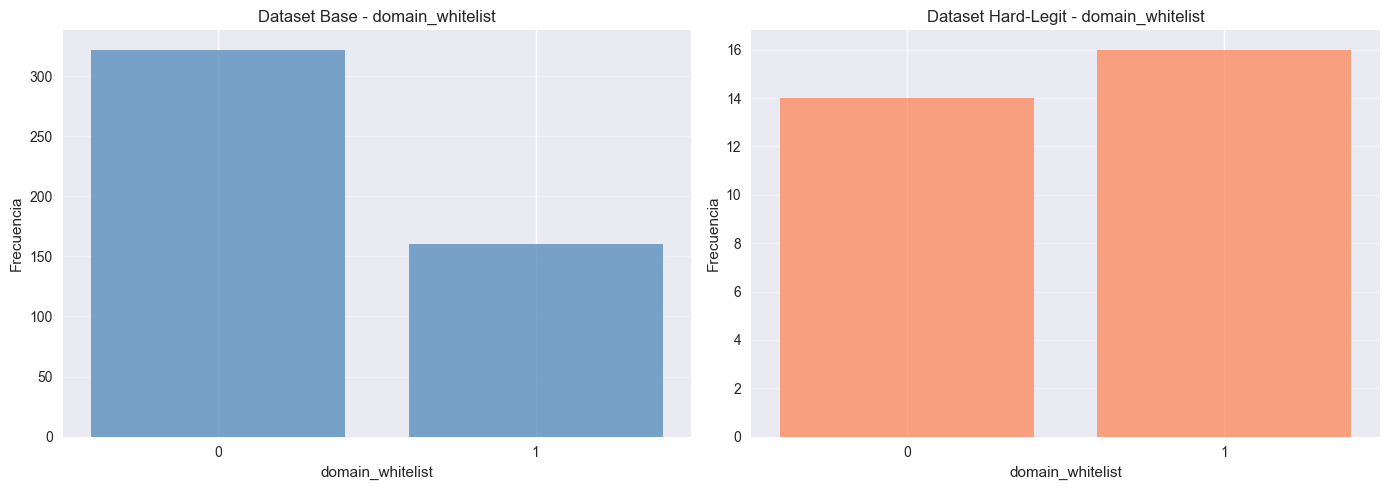

In [10]:
# Visualización comparativa domain_whitelist
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Base
dist_base_dw = df_base["domain_whitelist"].value_counts().sort_index()
axes[0].bar(dist_base_dw.index, dist_base_dw.values, color='steelblue', alpha=0.7)
axes[0].set_title('Dataset Base - domain_whitelist')
axes[0].set_xlabel('domain_whitelist')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticks([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Hard-Legit
dist_hard_dw = df_hard_legit["domain_whitelist"].value_counts().sort_index()
axes[1].bar(dist_hard_dw.index, dist_hard_dw.values, color='coral', alpha=0.7)
axes[1].set_title('Dataset Hard-Legit - domain_whitelist')
axes[1].set_xlabel('domain_whitelist')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticks([0, 1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


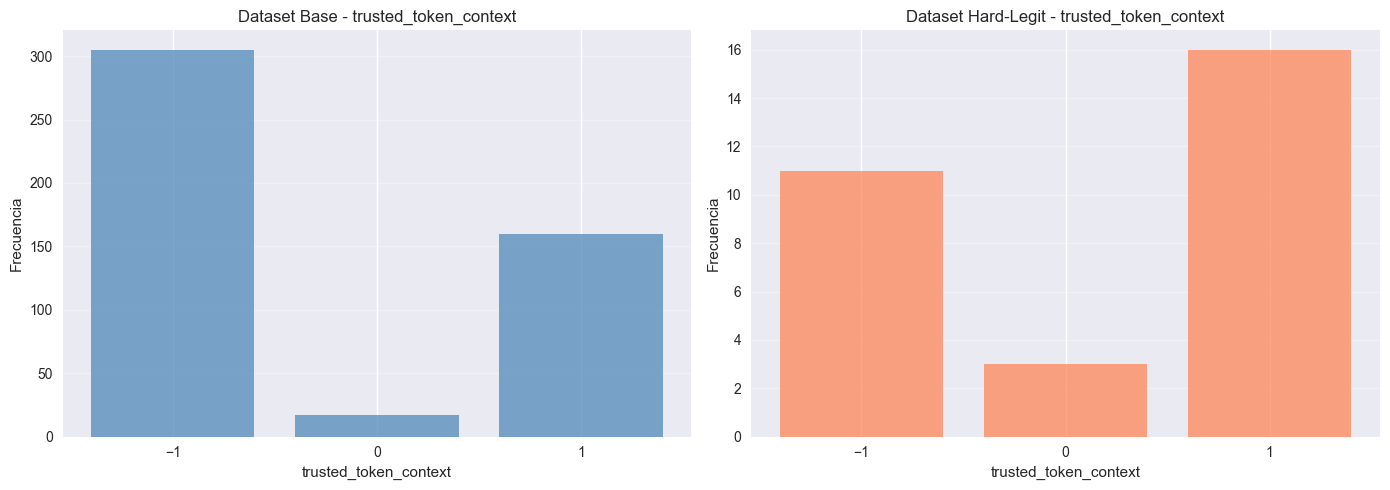

In [11]:
# Visualización comparativa trusted_token_context
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Base
dist_base_ttc = df_base["trusted_token_context"].value_counts().sort_index()
axes[0].bar(dist_base_ttc.index, dist_base_ttc.values, color='steelblue', alpha=0.7)
axes[0].set_title('Dataset Base - trusted_token_context')
axes[0].set_xlabel('trusted_token_context')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticks([-1, 0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Hard-Legit
dist_hard_ttc = df_hard_legit["trusted_token_context"].value_counts().sort_index()
axes[1].bar(dist_hard_ttc.index, dist_hard_ttc.values, color='coral', alpha=0.7)
axes[1].set_title('Dataset Hard-Legit - trusted_token_context')
axes[1].set_xlabel('trusted_token_context')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticks([-1, 0, 1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


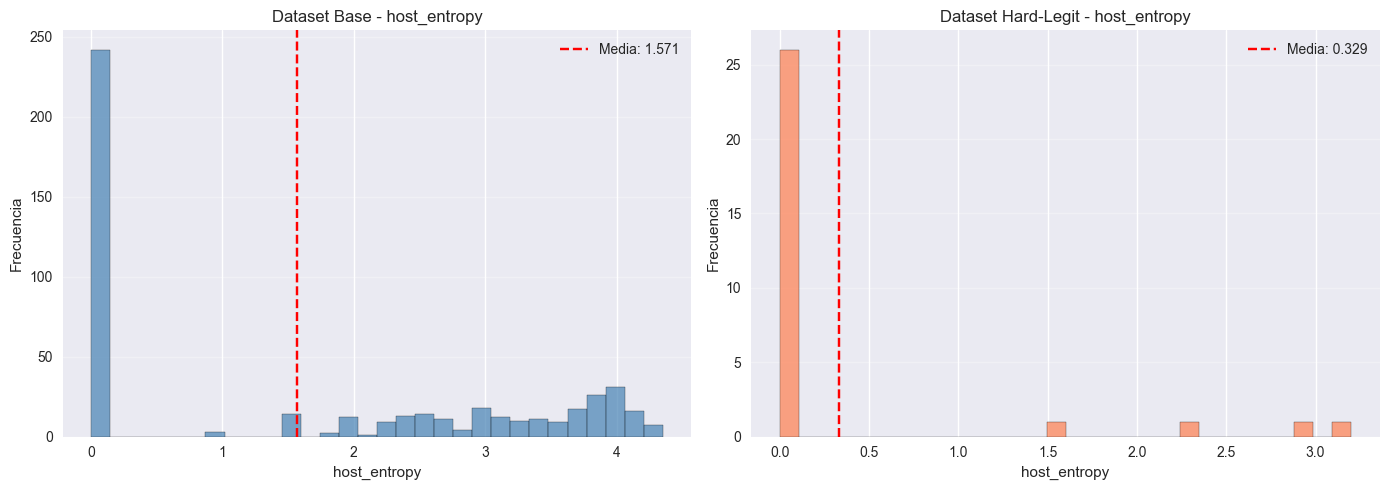

In [12]:
# Visualización comparativa host_entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Base
axes[0].hist(df_base["host_entropy"], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Dataset Base - host_entropy')
axes[0].set_xlabel('host_entropy')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df_base["host_entropy"].mean(), color='red', linestyle='--', label=f'Media: {df_base["host_entropy"].mean():.3f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Hard-Legit
axes[1].hist(df_hard_legit["host_entropy"], bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Dataset Hard-Legit - host_entropy')
axes[1].set_xlabel('host_entropy')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(df_hard_legit["host_entropy"].mean(), color='red', linestyle='--', label=f'Media: {df_hard_legit["host_entropy"].mean():.3f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


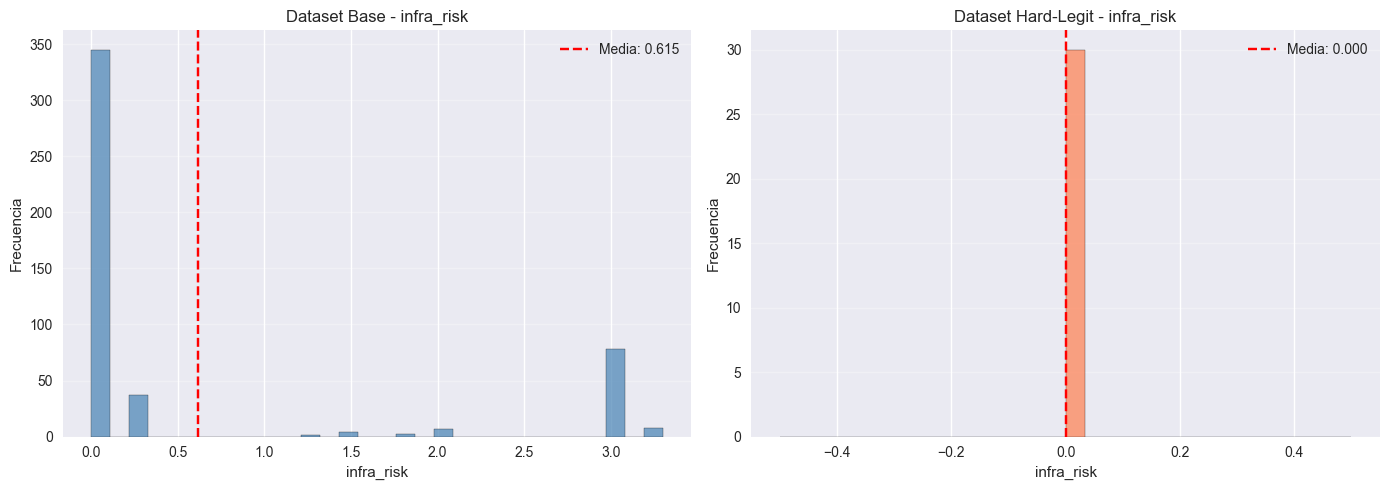

In [13]:
# Visualización comparativa infra_risk
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Base
axes[0].hist(df_base["infra_risk"], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Dataset Base - infra_risk')
axes[0].set_xlabel('infra_risk')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df_base["infra_risk"].mean(), color='red', linestyle='--', label=f'Media: {df_base["infra_risk"].mean():.3f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Hard-Legit
axes[1].hist(df_hard_legit["infra_risk"], bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Dataset Hard-Legit - infra_risk')
axes[1].set_xlabel('infra_risk')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(df_hard_legit["infra_risk"].mean(), color='red', linestyle='--', label=f'Media: {df_hard_legit["infra_risk"].mean():.3f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Análisis Comparativo por Entidad


In [14]:
# Conteo por entidad - Top N
N = 15  # Top 15 entidades

entidades_base = df_base["entidad"].value_counts().head(N)
entidades_hard = df_hard_legit["entidad"].value_counts().head(N)

print("=" * 80)
print(f"TOP {N} ENTIDADES - COMPARACIÓN")
print("=" * 80)

# Crear DataFrame comparativo
all_entidades = set(entidades_base.index) | set(entidades_hard.index)
comparison_entidades = pd.DataFrame({
    "Base": [entidades_base.get(e, 0) for e in all_entidades],
    "Hard-Legit": [entidades_hard.get(e, 0) for e in all_entidades]
}, index=list(all_entidades))

comparison_entidades["Diferencia Absoluta"] = comparison_entidades["Hard-Legit"] - comparison_entidades["Base"]
comparison_entidades["Diferencia %"] = ((comparison_entidades["Hard-Legit"] - comparison_entidades["Base"]) / 
                                         comparison_entidades["Base"].replace(0, np.nan) * 100).fillna(0)

# Ordenar por total
comparison_entidades["Total"] = comparison_entidades["Base"] + comparison_entidades["Hard-Legit"]
comparison_entidades = comparison_entidades.sort_values("Total", ascending=False).head(N)

print("\nComparación lado a lado:")
print(comparison_entidades[["Base", "Hard-Legit", "Diferencia Absoluta", "Diferencia %"]].to_string())


TOP 15 ENTIDADES - COMPARACIÓN

Comparación lado a lado:
           Base  Hard-Legit  Diferencia Absoluta  Diferencia %
correos      73           0                  -73   -100.000000
generico     56           0                  -56   -100.000000
santander    43           0                  -43   -100.000000
ing          26           0                  -26   -100.000000
caixabank    26           0                  -26   -100.000000
bbva         24           1                  -23    -95.833333
dgt          10           0                  -10   -100.000000
bankinter     9           0                   -9   -100.000000
binance       8           0                   -8   -100.000000
openbank      7           1                   -6    -85.714286
netflix       7           0                   -7   -100.000000
coinbase      7           0                   -7   -100.000000
ionos         7           0                   -7   -100.000000
abanca        6           0                   -6   -100.00000

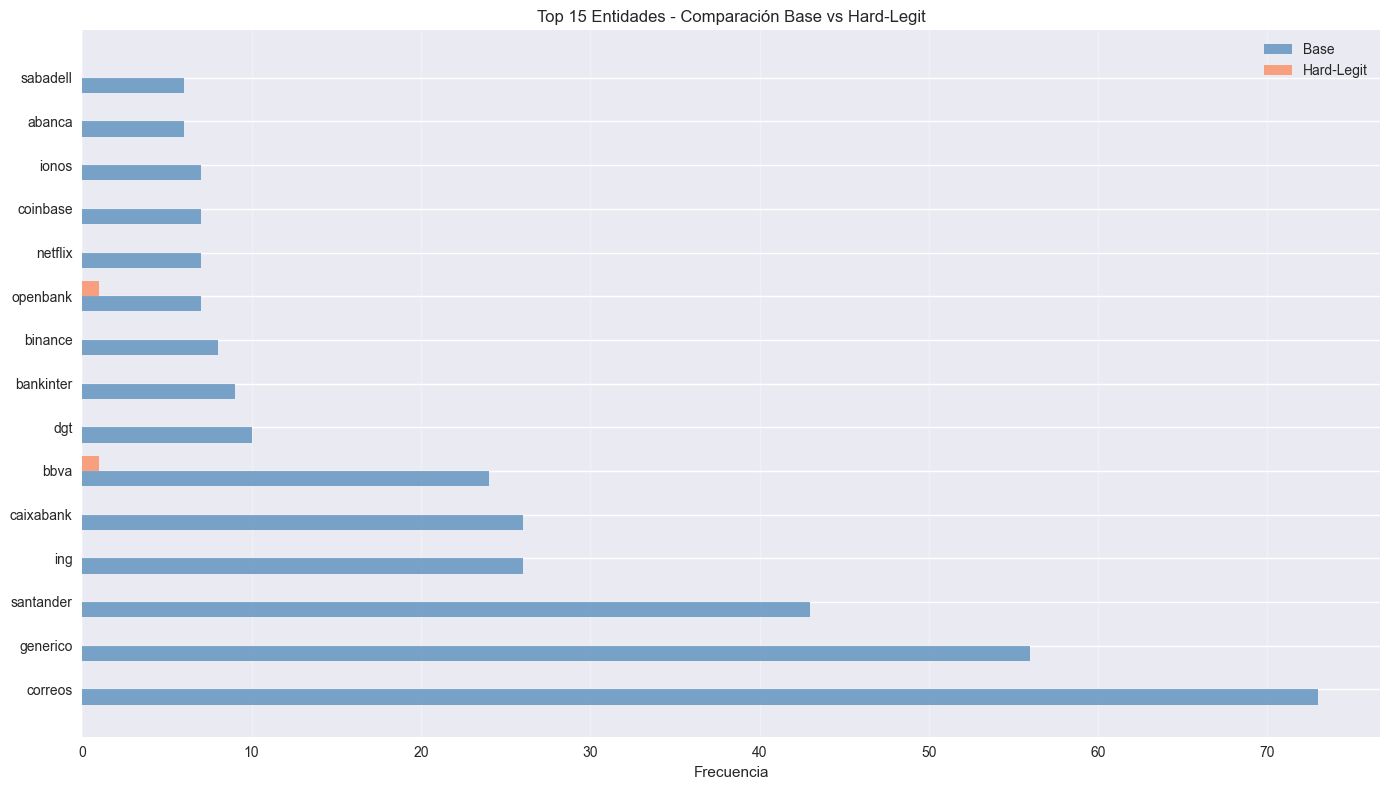

In [15]:
# Visualización comparativa por entidad
fig, ax = plt.subplots(figsize=(14, 8))

top_entidades = comparison_entidades.head(N)
x = np.arange(len(top_entidades))
width = 0.35

bars1 = ax.barh(x - width/2, top_entidades["Base"], width, label='Base', color='steelblue', alpha=0.7)
bars2 = ax.barh(x + width/2, top_entidades["Hard-Legit"], width, label='Hard-Legit', color='coral', alpha=0.7)

ax.set_xlabel('Frecuencia')
ax.set_title(f'Top {N} Entidades - Comparación Base vs Hard-Legit')
ax.set_yticks(x)
ax.set_yticklabels(top_entidades.index)
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Resumen Ejecutivo Comparativo

### Métricas Clave Comparadas

| Feature | Métrica | Base | Hard-Legit | Diferencia |
|---------|---------|------|------------|------------|
| **domain_whitelist** | % == 1 | - | - | - |
| **trusted_token_context** | % == +1 | - | - | - |
| **host_entropy** | Media | - | - | - |
| **infra_risk** | Media | - | - | - |

### Observaciones Principales

1. **domain_whitelist**: [Análisis de diferencias]
2. **trusted_token_context**: [Análisis de diferencias]
3. **host_entropy**: [Análisis de diferencias]
4. **infra_risk**: [Análisis de diferencias]
5. **Distribución por entidad**: [Análisis de diferencias]

### Conclusiones

- [Conclusiones del análisis comparativo]
